# Custom DataSets

In [48]:
import torch # type: ignore
from torch import nn # type: ignore


In [49]:
import requests # type: ignore
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
'''
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
## Download pizza!!!!
with open(data_path / "pizza_steak_sushi.zip" , "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)
### unzipping file
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unizpping data")
    zip_ref.extractall(image_path) 
    '''

'\nif image_path.is_dir():\n    print(f"{image_path} directory already exists... skipping download")\nelse:\n    print(f"{image_path} does not exist, creating one...")\n    image_path.mkdir(parents=True, exist_ok=True)\n    \n## Download pizza!!!!\nwith open(data_path / "pizza_steak_sushi.zip" , "wb") as f:\n    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")\n    f.write(request.content)\n### unzipping file\nwith zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:\n    print("Unizpping data")\n    zip_ref.extractall(image_path) \n    '

## 2. Becoming one with the data (data preparation and exploration) 

In [50]:
import os 
def walk_through_dir(dir_path):
    for dirpath, dirname, filenames in os.walk(dir_path):
        print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

In [51]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [52]:
#Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

## 2.1 Visualizing image
1. Get all of the image paths
2. Pick a random image path using Pythons `random.choice()`
3. Get the image class name using `pathlib.path.parent.stem`
4. Since we re working with image use PIL
5. We will then show  the image and print metadata.

data\pizza_steak_sushi\test\pizza\344397.jpg
pizza
Random image path: data\pizza_steak_sushi\test\pizza\344397.jpg
Image class: pizza
Image height:342
Image width: 512


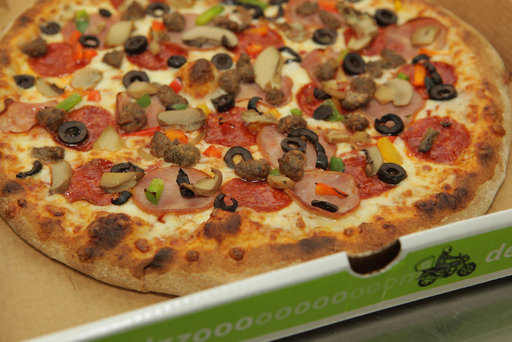

In [53]:
import random
from PIL import Image # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

#random.seed(42)
#1. Get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))
#2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)
#3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)
#4. Open image 
img = Image.open(random_image_path)
#5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height:{img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 341.5, -0.5)

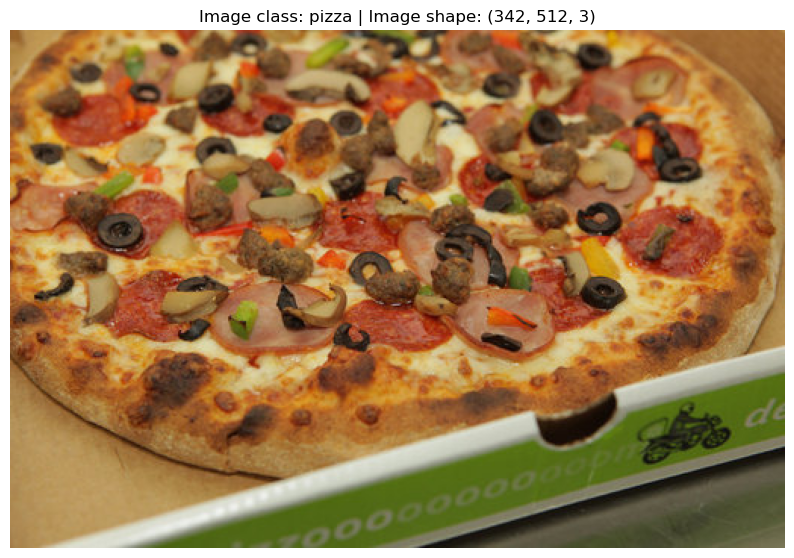

In [54]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
# Turning image as array
img_as_array = np.asarray(img)

#plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)

## 3. Transforming data into tensor format
1. Turn data into tensor in case of numerical representation
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.dataloader` we cal these `Dataset` and `Dataloader`

In [55]:
import torch
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms 

## 3.1 Transforming data with `torchvison.transforms`

In [56]:
data_transform = transforms.Compose([
    ## resizing our images to 64x64
    transforms.Resize(size=(64,64)),
    #Flip images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn image to tensor
    transforms.ToTensor()
    ])

In [57]:
data_transform(img)

tensor([[[0.6392, 0.6235, 0.6275,  ..., 0.7451, 0.7059, 0.6157],
         [0.6235, 0.6157, 0.6196,  ..., 0.7451, 0.7059, 0.6431],
         [0.6235, 0.6157, 0.6196,  ..., 0.6980, 0.7255, 0.6863],
         ...,
         [0.3922, 0.3686, 0.3451,  ..., 0.7098, 0.6941, 0.6824],
         [0.4196, 0.4078, 0.3922,  ..., 0.7137, 0.6902, 0.6706],
         [0.4549, 0.4431, 0.4275,  ..., 0.7176, 0.6863, 0.6667]],

        [[0.4353, 0.4157, 0.4235,  ..., 0.5882, 0.5451, 0.4196],
         [0.4157, 0.4118, 0.4118,  ..., 0.5922, 0.5412, 0.4588],
         [0.4157, 0.4078, 0.4118,  ..., 0.5176, 0.5647, 0.5216],
         ...,
         [0.3922, 0.3765, 0.3608,  ..., 0.5765, 0.5529, 0.5373],
         [0.4157, 0.4039, 0.3961,  ..., 0.5765, 0.5490, 0.5294],
         [0.4431, 0.4314, 0.4196,  ..., 0.5843, 0.5451, 0.5216]],

        [[0.2157, 0.2039, 0.2039,  ..., 0.3216, 0.2941, 0.1961],
         [0.2039, 0.2000, 0.2000,  ..., 0.3255, 0.2941, 0.2275],
         [0.2039, 0.1961, 0.2078,  ..., 0.2824, 0.3059, 0.

In [58]:
image_path

WindowsPath('data/pizza_steak_sushi')

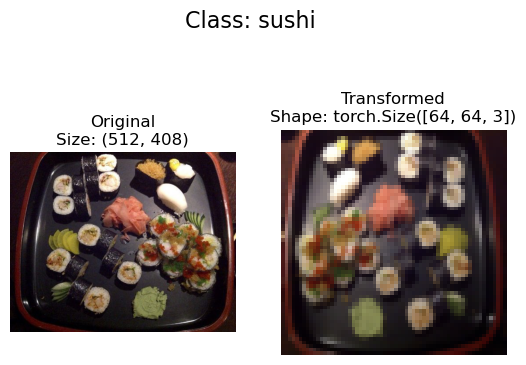

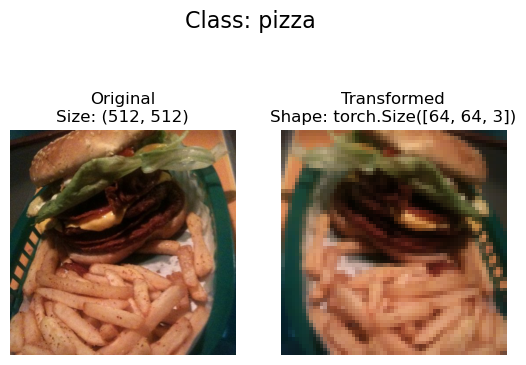

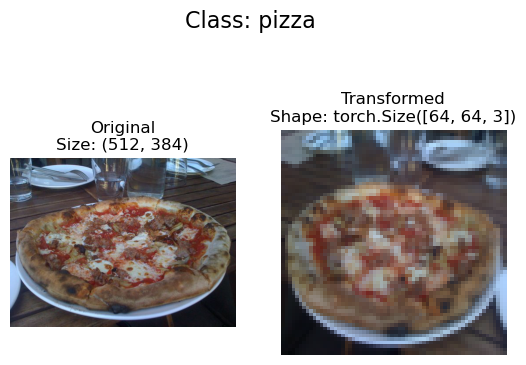

In [59]:
def plot_transformed_images(image_paths, transform, n=3, seed =None):
    """
    Select random images from a path of images and loads/transforms 
    them then plots the original vs the transformed version
    """
    if seed:
        random.seed(seed)    
    random_image_paths =random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig , ax = plt.subplots(nrows=1 , ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)
            #Transform and plot target image
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
            
plot_transformed_images(image_paths = image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)
            

## 4. Option 1 loading image data using `ImageFolder` 

In [60]:
#Use imagefolder to create dataset
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root = test_dir,
                                  transform=data_transform,
                                  target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [61]:
#Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [62]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [63]:
len(train_data) , len(test_data)

(225, 75)

In [64]:
train_data.classes

['pizza', 'steak', 'sushi']

In [65]:
img , label = train_data[0][0] , train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: \n {img.shape}")
print(f"Image datatype: \n {img.dtype}")
print(f"Image label: { label}")
print(f"Image label type: {type(label)}")

Image tensor: 
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

Original shape: torch.Size([3, 64, 64])
Image permute: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

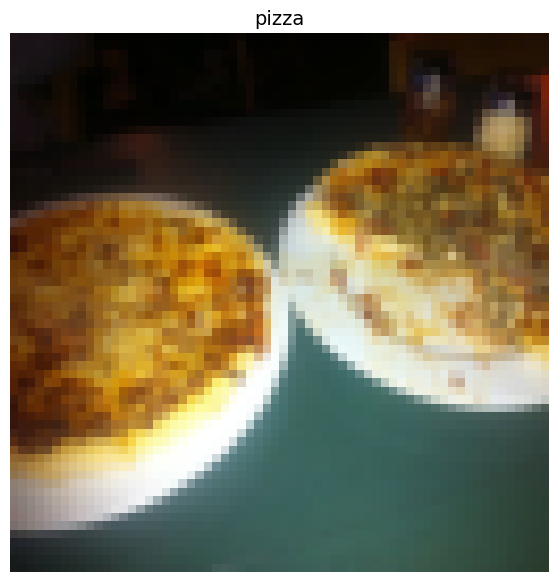

In [66]:
#Rearrange the order dimensions
img_permute = img.permute(1,2,0)
print(f"Original shape: {img.shape}")
print(f"Image permute: {img_permute.shape}")
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 14)

## Turn datasets to data loader

In [67]:
#
train_data_loader = DataLoader(dataset=train_data,
                               batch_size=1,
                               num_workers=1,
                               shuffle=True)
test_data_loader = DataLoader(dataset=test_data,
                               batch_size=1,
                               num_workers=1,
                               shuffle=False)
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x140c6423370>,
 <torch.utils.data.dataloader.DataLoader at 0x140c6423310>)

In [68]:
img, label = next(iter(train_data_loader))
print(f"Image shape: {img.shape}")
print(f"Image label: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64])
Image label: torch.Size([1])


## 5 Option 2 laoding image data with a custom `Dataset`

1. want to be able to load images from file
2. want to be able to get class names from the Dataset
3. want to be able to get classes as dict from dataset

Pros:
* can create `Dataset` out of almost anything

* Not limited to Pytorch pre built `Dataset` functions

Cons:
* Even though you could create `Datasets` it doesnt mean it will work...
* Using custom `Datasets` = more code and more potential errors or performance errors.


In [69]:
import os 
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict , List


In [70]:
train_data.classes , train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## 5.1 Creating helper function to get class names
We want a function to:
1. Get the names using `os.scandir()` to traverse a target directory
2. Raise error if class names not found
3. Turn class names into a dict and list and return them

In [71]:
target_directory = train_dir
print(f"target_dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

target_dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [72]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
    #1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(target_directory) if entry.is_dir())
    #2. Raise error id class names not found
    if not classes:
        raise FileNotFoundError(f"Couldnt find ant classes in {directory}... please check file struct.")
    #3. Create a directory od index labels (computers prefer numbers rather than string as labels)
    class_to_idx  = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [73]:
class_names, class_to_idx = find_classes(target_directory)
class_names , class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Replicate `ImageFolder`
1. subclass `torch.utils.data.Dataset`
2. Init out subclass with a target directory as well as a transform if we like to transform our data.
3. Create several attribute:
    * paths - path of image
    * transform - transform we like to use
    * classes - list of target classes
    * class+to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image
5. Overwirte the `__len()__` method to return the length of our dataset
6. Overwrite the `__getitem()__` method to return a given sample when passes an index

In [74]:
#1. subclass
class ImageFolderCustom(Dataset):
    #2. initialize dataset
    def __init__(self , 
                 targ_dir: str,
                 transform = None):
        #3. Create attribute
        self.path = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)
    #4 loading image function
    def load_image(self, index: int) -> Image.Image:
        #open image via a path and returns it.
        image_path = self.path[index]
        return Image.open(image_path)
    #5 Overwrite __len__()
    def __len__(self) -> int:
        return len(self.path)
    #6 Overwrite getitem to return particular sample
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.path[index].parent.name
        class_idx = self.class_to_idx[class_name]
        
        #Transform id necessary
        if self.transform:
            return self.transform(img) , class_idx
        else:
            return img , class_idx

In [75]:
img, label = train_data[0]
img , label

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [76]:
# Create transform
train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])


In [77]:
# Testing Imagefolder class
train_data_custom = ImageFolderCustom(targ_dir= train_dir,
                                     transform=train_transform)
test_data_cutsom = ImageFolderCustom(targ_dir= test_dir,
                                     transform=test_transform)

In [78]:
len(train_data) , len(train_data_custom)

(225, 225)

In [79]:
train_data_custom.classes , train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [80]:
train_data_custom.classes == train_data.classes

True

## 5.3 Creating display random image function

1. Take `Dataset` and other param as class names and number of images to visualize.
2. random seed
3. list of random indexes
4. setup matplotlib
5. check image dimensions (H,W,C)

In [81]:
def display_random_images(dataset,
                          classses: List[str] = None,
                          n: int = 10,
                          display_shape : bool = True,
                          seed:int = None):
    #Maximum display is 10
    if n> 10:
        n = 10
        display_shape = False
        print(f"n = 10 is large thus display_shape is removed")
    if seed:
        random.seed(seed)
    # Random samples
    random_samples_idx = random.sample(range(len(dataset)), k = n)
    
    plt.figure(figsize=(16,8))
    
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image , targ_label = dataset[targ_sample][0]  ,dataset[targ_sample][1]
        
        targ_image_adjust = targ_image.permute(1,2,0)
        
        plt.subplot(1, n ,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classses:
            title = f"Class: {classses[targ_label]}"
            if display_shape:
                title = title + f"\n shape: {targ_image_adjust.shape}"
            plt.title(title)
        
        

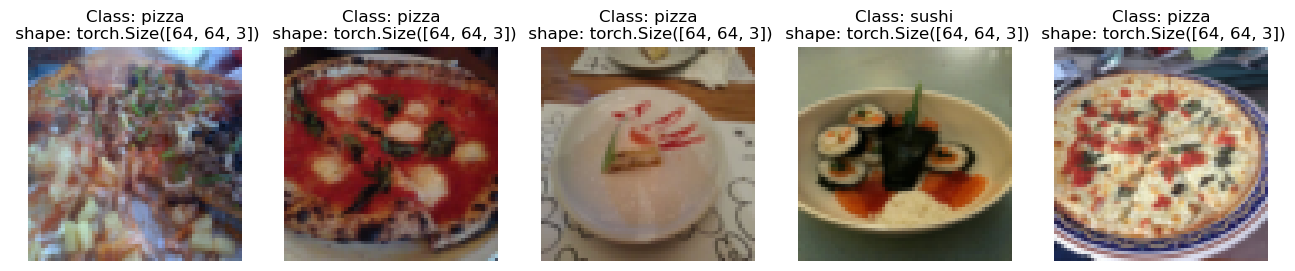

In [82]:
display_random_images(train_data,
                      n = 5,
                      classses= class_names,
                      seed= None)

### 5.4 Turn custom  loaded images into a `Dataloader`

In [83]:
train_data_loader_custom = DataLoader(dataset=train_data_custom,
                                      batch_size=32,
                                      num_workers=0,
                                      shuffle=True)
test_data_loader_custom = DataLoader(dataset=test_data_cutsom,
                                      batch_size=32,
                                      num_workers=1,
                                      shuffle=False)
train_data_loader_custom, test_data_loader_custom

(<torch.utils.data.dataloader.DataLoader at 0x140c78279a0>,
 <torch.utils.data.dataloader.DataLoader at 0x140c77d3d30>)

In [84]:
img_custom , label_custom = next(iter(train_data_loader_custom))
img_custom.shape , label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# 6. Data augmentation 
Adding diversity into your training data
use image rotation - shifting - cropping -zooming

In [85]:
train_transform1 =transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])
test_transform1 =transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.ToTensor()])

In [86]:
image_path_list = list(image_path.glob("*/*/*.jpg"))


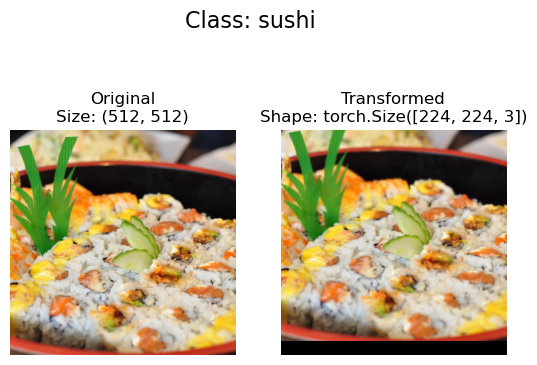

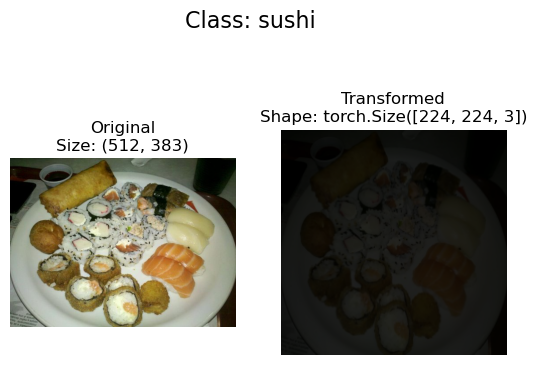

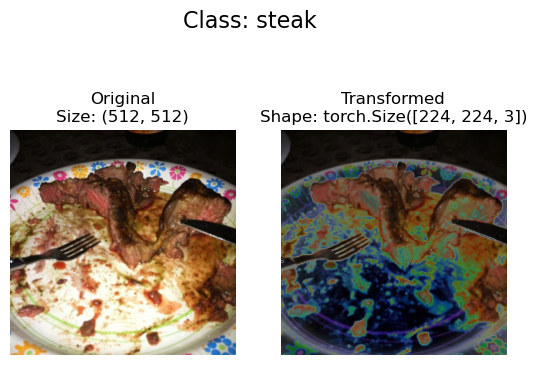

In [87]:
plot_transformed_images(
    image_paths= image_path_list,
    transform=train_transform1,
)

In [88]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()   
])

In [89]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                         transform=simple_transform)
train_data_loader_simple = DataLoader(dataset= train_data_simple,
                                      batch_size=32,
                                      shuffle=True,
                                      num_workers=1)
test_data_loader_simple = DataLoader(dataset= test_data_simple,
                                      batch_size=32,
                                      shuffle=False,
                                      num_workers=1)

In [90]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape , hidden_units , output_shape) -> None:
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )       
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,
                      out_features=output_shape)
        )
    def forward(self, x):
        x =self.conv_block1(x)
        #print(x.shape)
        x =self.conv_block2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [91]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to("cpu")
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [92]:
image_batch , label_batch = next(iter(train_data_loader_simple))
image_batch.type() , label_batch.type()

('torch.FloatTensor', 'torch.LongTensor')

In [93]:
model_0(image_batch)

tensor([[ 2.0789e-02, -1.9351e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6316e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0999e-02,  1.2869e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7293e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1838e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4455e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3782e-03],
        [ 2.2863e-02, -1.7723e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5021e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4219e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8264e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

In [94]:
from torchinfo import summary
batch_size  = 32
summary(model_0 , input_size=(1, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [95]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to("cpu"), y.to("cpu")

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [96]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to("cpu"), y.to("cpu")
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [97]:
import torch.utils.data.dataloader
from tqdm.auto import tqdm
# 1. Create a train function takes various model parameters
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.dataloader,
          test_dataloader: torch.utils.data.dataloader,
          optimzier : torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int =5,
          device = "cpu"):
    # empty result dict to track results every epoch
    results = {"train loss" : [],
               "train acc" : [],
               "test loss" : [],
               "test acc": []}
    for epoch in tqdm(range(epochs)):
        train_loss , train_acc = train_step(model=model,
                                            dataloader=train_dataloader,
                                            loss_fn=loss_fn,
                                            optimizer=optimzier
                                            )
        test_loss , test_acc = test_step(model=model,
                                          dataloader=test_dataloader,
                                          loss_fn=loss_fn,
                                          )
        print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.3f} | Test loss: {test_loss:.3f} | Test acc: {test_acc}")     
        results["train loss"].append(train_loss)
        results["train acc"].append(train_acc)   
        results["test loss"].append(test_loss)   
        results["test acc"].append(train_acc)      
    return results

c:\Users\aelsha33\AppData\Local\anaconda3\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [98]:
torch.manual_seed(42)
# number of epochs
Num_Epochs = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr =0.001)
from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_data_loader_simple,
                        test_dataloader= test_data_loader_simple,
                        optimzier=optimizer,
                        loss_fn=loss_fn,
                        epochs=Num_Epochs)

end_time = timer()
print(f"total time: {end_time - start_time:.3f} seconds")

 20%|██        | 1/5 [00:09<00:39,  9.97s/it]

Epoch: 0 | Train loss: 1.103 | Train acc: 0.250 | Test loss: 1.099 | Test acc: 0.2604166666666667


 40%|████      | 2/5 [00:19<00:29,  9.68s/it]

Epoch: 1 | Train loss: 1.076 | Train acc: 0.426 | Test loss: 1.130 | Test acc: 0.2604166666666667


 60%|██████    | 3/5 [00:29<00:19,  9.66s/it]

Epoch: 2 | Train loss: 1.072 | Train acc: 0.426 | Test loss: 1.161 | Test acc: 0.2604166666666667


 80%|████████  | 4/5 [00:38<00:09,  9.64s/it]

Epoch: 3 | Train loss: 1.107 | Train acc: 0.305 | Test loss: 1.147 | Test acc: 0.2604166666666667


100%|██████████| 5/5 [00:48<00:00,  9.63s/it]

Epoch: 4 | Train loss: 1.082 | Train acc: 0.367 | Test loss: 1.149 | Test acc: 0.25
total time: 48.150 seconds


In [99]:
model_0_results

{'train loss': [1.1033858209848404,
  1.0762499868869781,
  1.072318121790886,
  1.1068574041128159,
  1.0816865414381027],
 'train acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.3671875],
 'test loss': [1.0994157393773396,
  1.1297622521718342,
  1.160706341266632,
  1.1468542615572612,
  1.1490658124287922],
 'test acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.3671875]}